In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
pd.options.display.max_rows = 200

In [4]:
df=pd.read_csv("/content/drive/MyDrive/CIC-IDS-2018.csv")
df

<ipython-input-4-74ac0b165da8>:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/CIC-IDS-2018.csv")


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,57610,6,02/03/2018 04:14:05,25,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,52347,6,02/03/2018 02:48:44,63,3,1,31,0.0,31,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,55970,6,16/02/2018 01:46:19,4217799,5,3,935,350.0,935,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,80,6,02/03/2018 05:17:21,54499550,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,3389,6,02/03/2018 01:53:13,2697973,9,10,1278,1677.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828419,22,6,14/02/2018 03:13:27,381223,22,22,1912,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828420,22,6,14/02/2018 03:27:51,324836,23,20,1928,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828421,22,6,14/02/2018 02:39:25,393769,22,20,1944,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828422,22,6,14/02/2018 03:16:09,297287,22,22,1928,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce


In [5]:
columns_to_drop = [
  'Dst Port',
  'Timestamp',
  'Fwd PSH Flags',
  'Bwd PSH Flags',
  'Fwd URG Flags',
  'Bwd URG Flags',
  'Flow Byts/s',
  'Flow Pkts/s']
df.drop(columns=columns_to_drop, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df=df[df["Label"]!="Label"]
attack_mapping = {
  'Benign': 0,
  'DDOS attack-HOIC': 1,
  'DoS attacks-Hulk': 2,
  'Bot': 3,
  'FTP-BruteForce': 4,
  'SSH-Bruteforce': 5,
  'Infilteration': 6,
  'DoS attacks-GoldenEye': 7,
  'DoS attacks-Slowloris': 8,
  'DDOS attack-LOIC-UDP': 9,
  'Brute Force -Web':10,
  'Brute Force -XSS':11,
  'SQL Injection':12,
}
df.loc[:, 'Label'] = df["Label"].map(attack_mapping)
df

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,25,2,0,0,0.0,0,0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,63,3,1,31,0.0,31,0,10.333333,17.897858,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,4217799,5,3,935,350.0,935,0,187.0,418.144712,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,54499550,2,0,0,0.0,0,0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,2697973,9,10,1278,1677.0,677,0,142.0,213.267438,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828418,6,393263,22,20,1928,2665,640,0,87.636364,137.780552,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5.0
828419,6,381223,22,22,1912,2665,640,0,86.909091,137.688022,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5.0
828420,6,324836,23,20,1928,2665,640,0,83.826087,135.847392,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5.0
828421,6,393769,22,20,1944,2665,640,0,88.363636,137.869001,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5.0


In [6]:
df["Label"].value_counts()

,count
Label,
0.0,521038
1.0,35609
2.0,29818
3.0,15238
6.0,13401
5.0,9429
7.0,4151
8.0,1026
9.0,173


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled = df.copy()
feature_cols = df.drop('Label', axis=1).columns
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])
df_scaled=df_scaled.groupby("Label").apply(lambda a:a)
df_scaled

<ipython-input-7-dba8bc2ac0a6>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_scaled=df_scaled.groupby("Label").apply(lambda a:a)


Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
Label                                                               
0.0   0       0.352941       0.998911      0.000006      0.000000   
      1       0.352941       0.998911      0.000013      0.000008   
      2       0.352941       0.998950      0.000026      0.000024   
      3       0.352941       0.999406      0.000006      0.000000   
      4       0.352941       0.998936      0.000051      0.000081   
...                ...            ...           ...           ...   
12.0  314570  0.352941       0.998957      0.000019      0.000032   
      314571  0.352941       0.998911      0.000006      0.000000   
      557396  0.352941       0.998957      0.000026      0.000024   
      557397  0.352941       0.998957      0.000019      0.000032   
      557398  0.352941       0.998957      0.000026      0.000032   

              TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
Label                                                             
0.0   0          0.000000e+00         0.000000         0.000000   
      1          2.146936e-07         0.000000         0.000698   
      2          6.475435e-06         0.000002         0.021062   
      3          0.000000e+00         0.000000         0.000000   
      4          8.850915e-06         0.000011         0.015250   
...                       ...              ...              ...   
12.0  314570     3.705195e-06         0.000002         0.012052   
      314571     0.000000e+00         0.000000         0.000000   
      557396     3.864484e-06         0.000002         0.012570   
      557397     4.058401e-06         0.000012         0.013201   
      557398     4.390830e-06         0.000026         0.014282   

              Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  ...  \
Label                                                             ...   
0.0   0                   0.0          0.000000         0.000000  ...   
      1                   0.0          0.001749         0.003367  ...   
      2                   0.0          0.031654         0.078660  ...   
      3                   0.0          0.000000         0.000000  ...   
      4                   0.0          0.024037         0.040119  ...   
...                       ...               ...              ...  ...   
12.0  314570              0.0          0.022640         0.050321  ...   
      314571              0.0          0.000000         0.000000  ...   
      557396              0.0          0.018891         0.046944  ...   
      557397              0.0          0.024799         0.055118  ...   
      557398              0.0          0.021464         0.053337  ...   

              Fwd Seg Size Min  Active Mean  Active Std  Active Max  \
Label                                                                 
0.0   0               0.454545          0.0         0.0         0.0   
      1               0.454545          0.0         0.0         0.0   
      2               0.727273          0.0         0.0         0.0   
      3               0.454545          0.0         0.0         0.0   
      4               0.454545          0.0         0.0         0.0   
...                        ...          ...         ...         ...   
12.0  314570          0.454545          0.0         0.0         0.0   
      314571          0.454545          0.0         0.0         0.0   
      557396          0.454545          0.0         0.0         0.0   
      557397          0.454545          0.0         0.0         0.0   
      557398          0.454545          0.0         0.0         0.0   

              Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  
Label                                                                     
0.0   0              0.0        0.0       0.0       0.0       0.0    0.0  
      1              0.0        0.0       0.0       0.0       0.0    0.0  
      2              0.0        0.0       0.0       0.0       0.0    0

In [8]:
def metrics(output,y_test,y_test_types,att_type):
    tp=tn=fp=fn=tpz=fnz=0
    for i in range(len(output)):
        if output[i]<0.5:
            if y_test[i]==0:
                tn+=1
            else:
                fn+=1
        else:
            if y_test[i]==1:
                tp+=1
            else:
                fp+=1
        if y_test_types[i]==att_type:
            if output[i]>=0.5:
                tpz+=1
            else:
                fnz+=1

    accuracy=((tp+tn)*100)/(tp+tn+fp+fn)
    dr=(tp*100)/(tp+fn)
    far=(fp*100)/(fp+tn)
    zdr=(tpz*100)/(tpz+fnz)
    return [accuracy,dr,far,zdr]

In [9]:
import tensorflow as tf
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from sklearn.model_selection import train_test_split

Simulating Zero Day Attacks

In [10]:
metricarr=[]

for att_type in range(1,13):

    # Organizing data for zero day attack
    df_train, df_test = train_test_split(df_scaled,train_size=0.8,random_state=52)
    zday=df_train[df_train["Label"]==att_type]
    df_test = pd.concat([df_test, zday]).sample(frac=1).reset_index(drop=True)
    zday_train=df_train[df_train["Label"]!=att_type].sample(frac=1).reset_index(drop=True)
    X_train=zday_train.drop(["Label"],axis=1)
    y_train=zday_train["Label"].apply(lambda a:1 if a>0 else 0)
    X_test=df_test.drop(["Label"],axis=1)
    y_test_types=df_test["Label"]
    y_test=y_test_types.apply(lambda a:1 if a>0 else 0)

    #Declaring the model
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        layers.Dense(100, activation='relu', input_shape=(71,), kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        layers.Dense(1, activation='sigmoid')
    ])
    early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1, restore_best_weights=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

    #Training the model
    model.fit(X_train, y_train, epochs=20, callbacks=[early_stopping],batch_size=64)

    #Getting the output
    output=model.predict(X_test)

    #Storing metrics in metric array
    metricarr.append(metrics(output,y_test,y_test_types,att_type))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9591 - loss: 0.1629
Epoch 2/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9715 - loss: 0.1201
Epoch 3/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9725 - loss: 0.1157
Epoch 4/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9728 - loss: 0.1137
Epoch 5/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9731 - loss: 0.1118
Epoch 6/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9728 - loss: 0.1125
Epoch 7/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9727 - loss: 0.1123
Epoch 8/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9726 - loss: 0.1121
Epoch 9/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9732 - loss: 0.1098
Epoch 10/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9732 - loss: 0.1097
Epoch 11/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9733 - loss: 0.1092
Epoch 12/20
7432/74

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9558 - loss: 0.1670
Epoch 2/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9703 - loss: 0.1228
Epoch 3/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9717 - loss: 0.1170
Epoch 4/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9715 - loss: 0.1163
Epoch 5/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9722 - loss: 0.1136
Epoch 6/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9720 - loss: 0.1138
Epoch 7/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9719 - loss: 0.1137
Epoch 8/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9726 - loss: 0.1113
Epoch 9/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9722 - loss: 0.1124
Epoch 10/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9725 - loss: 0.1119
Epoch 11/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9728 - loss: 0.1103
Epoch 12/20
7503/75

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9585 - loss: 0.1611
Epoch 2/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9752 - loss: 0.1099
Epoch 3/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9755 - loss: 0.1071
Epoch 4/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9754 - loss: 0.1055
Epoch 5/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9755 - loss: 0.1041
Epoch 6/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9758 - loss: 0.1031
Epoch 7/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9757 - loss: 0.1030
Epoch 8/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9760 - loss: 0.1016
Epoch 9/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9758 - loss: 0.1021
Epoch 10/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9760 - loss: 0.1009
Epoch 11/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9761 - loss: 0.1009
Epoch 12/20
7685/76

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9559 - loss: 0.1689
Epoch 2/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9728 - loss: 0.1166
Epoch 3/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9732 - loss: 0.1132
Epoch 4/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9734 - loss: 0.1106
Epoch 5/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9731 - loss: 0.1109
Epoch 6/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9734 - loss: 0.1092
Epoch 7/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9734 - loss: 0.1095
Epoch 8/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9737 - loss: 0.1083
Epoch 9/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9735 - loss: 0.1086
Epoch 10/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9736 - loss: 0.1080
Epoch 11/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9739 - loss: 0.1066
Epoch 12/20
7875/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9558 - loss: 0.1693
Epoch 2/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9725 - loss: 0.1183
Epoch 3/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9729 - loss: 0.1140
Epoch 4/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9732 - loss: 0.1119
Epoch 5/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9731 - loss: 0.1111
Epoch 6/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9731 - loss: 0.1102
Epoch 7/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9732 - loss: 0.1095
Epoch 8/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9735 - loss: 0.1090
Epoch 9/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9730 - loss: 0.1100
Epoch 10/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9734 - loss: 0.1082
Epoch 11/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9734 - loss: 0.1075
Epoch 12/20
7758/77

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9752 - loss: 0.0902
Epoch 2/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9934 - loss: 0.0339
Epoch 3/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9935 - loss: 0.0307
Epoch 4/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9936 - loss: 0.0297
Epoch 5/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9939 - loss: 0.0285
Epoch 6/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9942 - loss: 0.0272
Epoch 7/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9943 - loss: 0.0265
Epoch 8/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9945 - loss: 0.0258
Epoch 9/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9944 - loss: 0.0259
Epoch 10/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9944 - loss: 0.0257
Epoch 11/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9945 - loss: 0.0252
Epoch 12/20
7709/77

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9567 - loss: 0.1670
Epoch 2/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9725 - loss: 0.1181
Epoch 3/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9733 - loss: 0.1133
Epoch 4/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9731 - loss: 0.1123
Epoch 5/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9735 - loss: 0.1102
Epoch 6/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9734 - loss: 0.1100
Epoch 7/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9735 - loss: 0.1088
Epoch 8/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9737 - loss: 0.1082
Epoch 9/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9741 - loss: 0.1069
Epoch 10/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9740 - loss: 0.1075
Epoch 11/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9742 - loss: 0.1065
Epoch 12/20
7824/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9550 - loss: 0.1689
Epoch 2/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9728 - loss: 0.1170
Epoch 3/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9737 - loss: 0.1114
Epoch 4/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9738 - loss: 0.1098
Epoch 5/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9743 - loss: 0.1080
Epoch 6/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9736 - loss: 0.1093
Epoch 7/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9740 - loss: 0.1079
Epoch 8/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9742 - loss: 0.1068
Epoch 9/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9744 - loss: 0.1061
Epoch 10/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9746 - loss: 0.1051
Epoch 11/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9745 - loss: 0.1050
Epoch 12/20
7863/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9531 - loss: 0.1743
Epoch 2/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9725 - loss: 0.1184
Epoch 3/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9729 - loss: 0.1145
Epoch 4/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9733 - loss: 0.1118
Epoch 5/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9730 - loss: 0.1115
Epoch 6/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9730 - loss: 0.1110
Epoch 7/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9733 - loss: 0.1094
Epoch 8/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9730 - loss: 0.1100
Epoch 9/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9733 - loss: 0.1088
Epoch 10/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9730 - loss: 0.1089
Epoch 11/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9737 - loss: 0.1073
Epoch 12/20
7873/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9562 - loss: 0.1693
Epoch 2/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9728 - loss: 0.1167
Epoch 3/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9732 - loss: 0.1131
Epoch 4/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9732 - loss: 0.1117
Epoch 5/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9737 - loss: 0.1096
Epoch 6/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9736 - loss: 0.1094
Epoch 7/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9740 - loss: 0.1076
Epoch 8/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9736 - loss: 0.1081
Epoch 9/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9741 - loss: 0.1068
Epoch 10/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9739 - loss: 0.1067
Epoch 11/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9741 - loss: 0.1066
Epoch 12/20
7875/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9546 - loss: 0.1727
Epoch 2/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9718 - loss: 0.1195
Epoch 3/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9726 - loss: 0.1147
Epoch 4/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9728 - loss: 0.1128
Epoch 5/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9734 - loss: 0.1100
Epoch 6/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9736 - loss: 0.1096
Epoch 7/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9733 - loss: 0.1098
Epoch 8/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9742 - loss: 0.1069
Epoch 9/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9739 - loss: 0.1077
Epoch 10/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9741 - loss: 0.1070
Epoch 11/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9742 - loss: 0.1064
Epoch 12/20
7875/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9561 - loss: 0.1684
Epoch 2/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9722 - loss: 0.1187
Epoch 3/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9731 - loss: 0.1138
Epoch 4/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9738 - loss: 0.1107
Epoch 5/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9738 - loss: 0.1094
Epoch 6/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9733 - loss: 0.1106
Epoch 7/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9735 - loss: 0.1097
Epoch 8/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9737 - loss: 0.1087
Epoch 9/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9737 - loss: 0.1086
Epoch 10/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9734 - loss: 0.1090
Epoch 11/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9736 - loss: 0.1080
Epoch 12/20
7876/78

In [11]:
print(*metricarr,sep="\n")

[74.8673873197018, 23.374893117779237, 0.25934606370307756, 0.0]
[97.04426266696913, 91.13830019663536, 0.35924232527759636, 95.93198739016701]
[86.82310208098174, 47.36625997184421, 0.25454335881968726, 0.006562541015881349]
[97.35006862846217, 87.09706834450371, 0.48987589810581317, 97.61904761904762]
[97.5313910914441, 90.29169071954905, 0.4207169477849925, 99.17276487432389]
[89.92259971322389, 58.666830346182174, 0.29488607984016596, 1.171554361614805]
[97.48281275374872, 87.8625560449153, 0.18826603142890075, 96.77186220187906]
[96.9095984607135, 85.4254756871036, 0.5859299957736197, 50.38986354775828]
[97.12879214262499, 86.5659452837893, 0.634917585584201, 0.0]
[97.32255479837846, 87.2362724994304, 0.5513505206132093, 0.0]
[97.46002777226741, 86.9827074873386, 0.33426825988396663, 0.0]
[97.37800668195634, 86.42651691549104, 0.3179390632804395, 0.0]


In [12]:
att_types=[  'Benign',
  'DDOS attack-HOIC',
  'DoS attacks-Hulk',
  'Bot',
  'FTP-BruteForce',
  'SSH-Bruteforce',
  'Infilteration',
  'DoS attacks-GoldenEye',
  'DoS attacks-Slowloris',
  'DDOS attack-LOIC-UDP',
  'Brute Force -Web',
  'Brute Force -XSS',
  'SQL Injection']

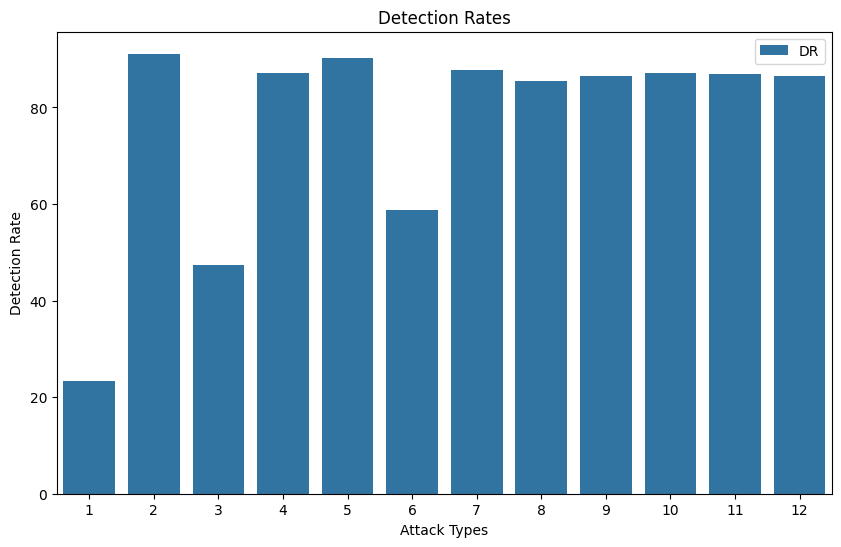

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

mdf = pd.DataFrame(metricarr, columns=['Accuracy', 'DR', 'FAR', 'ZDR'])
plt.figure(figsize=(10, 6))
sns.barplot(data=mdf, x=mdf.index+1, y='DR', label='DR')
plt.xlabel('Attack Types')
plt.ylabel('Detection Rate')
plt.title('Detection Rates')
plt.legend()
plt.show()

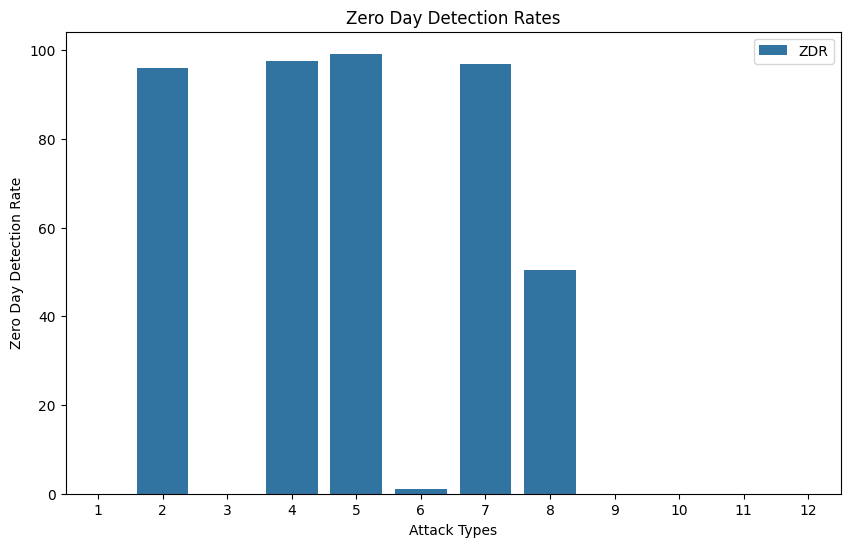

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mdf, x=mdf.index+1, y='ZDR', label='ZDR')
plt.xlabel('Attack Types')
plt.ylabel('Zero Day Detection Rate')
plt.title('Zero Day Detection Rates')
plt.legend()
plt.show()